In [57]:
#train
import numpy as np
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV


# plot
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import imageio
from PIL import Image

In [61]:
X = np.load('np-array-h0.npy')
X

array([[297.3    , 297.71   , 297.59998, ..., 298.3    , 298.9    ,
        300.09998],
       [298.09998, 298.     , 298.21   , ..., 297.81   , 299.59998,
        301.5    ],
       [298.8    , 299.     , 299.21   , ..., 299.3    , 299.9    ,
        301.     ],
       ...,
       [298.9    , 299.1    , 299.3    , ..., 300.1    , 299.3    ,
        299.5    ],
       [299.6    , 300.2    , 300.2    , ..., 298.9    , 298.3    ,
        298.5    ],
       [300.4    , 300.4    , 300.2    , ..., 299.30002, 299.30002,
        300.1    ]], dtype=float32)

In [62]:
Y = np.load('np-array-h6.npy')
Y

array([[298.     , 298.3    , 298.09998, ..., 297.21   , 297.8    ,
        298.4    ],
       [298.     , 298.31   , 298.4    , ..., 296.71   , 297.59998,
        298.59998],
       [298.09998, 298.5    , 298.8    , ..., 298.7    , 299.2    ,
        300.09998],
       ...,
       [299.     , 299.80002, 300.     , ..., 298.1    , 297.6    ,
        297.5    ],
       [299.9    , 300.4    , 300.2    , ..., 297.1    , 296.9    ,
        297.1    ],
       [300.19998, 300.5    , 300.1    , ..., 296.69998, 297.     ,
        297.5    ]], dtype=float32)

In [63]:
X_test = np.load('np-array-h0-2023.npy')
X_test

array([[300.125 , 300.3125, 300.375 , ..., 298.    , 298.1875, 299.1875],
       [300.1875, 300.125 , 299.8125, ..., 297.1875, 297.6875, 299.1875],
       [299.5   , 299.125 , 299.3125, ..., 297.8125, 298.125 , 299.125 ],
       ...,
       [301.    , 300.3125, 300.875 , ..., 299.125 , 300.    , 300.8125],
       [301.125 , 300.875 , 301.3125, ..., 299.8125, 300.8125, 301.375 ],
       [301.125 , 300.8125, 301.125 , ..., 299.1875, 299.5   , 299.8125]],
      dtype=float32)

In [67]:
Y_test = np.load('np-array-h6-2023.npy')
Y_test

array([[300.5   , 301.1875, 301.    , ..., 297.3125, 297.3125, 297.6875],
       [299.8125, 299.875 , 299.375 , ..., 296.8125, 297.125 , 298.125 ],
       [298.875 , 299.1875, 299.125 , ..., 296.875 , 297.3125, 298.125 ],
       ...,
       [300.375 , 300.5   , 301.    , ..., 298.3125, 299.    , 299.1875],
       [300.875 , 301.    , 301.125 , ..., 297.5   , 298.1875, 298.875 ],
       [300.625 , 300.5   , 300.625 , ..., 299.    , 299.5   , 299.3125]],
      dtype=float32)

In [69]:
model = MultiOutputRegressor(LinearRegression())
model.fit(X,Y)
print(f'R^2: {model.score(X_test,Y_test)}')
print(f'MAE: {mean_absolute_error(Y_test,model.predict(X_test))}')
print(f'MAPE: {mean_absolute_percentage_error(Y_test,model.predict(X_test))}')

R^2: 0.5665391437294972
MAE: 0.5008983016014099
MAPE: 0.0016757517587393522


In [70]:
model = MultiOutputRegressor(RandomForestRegressor(n_jobs=-1))
model.fit(X,Y)
print(f'R^2: {model.score(X_test,Y_test)}')
print(f'MAE: {mean_absolute_error(Y_test,model.predict(X_test))}')
print(f'MAPE: {mean_absolute_percentage_error(Y_test,model.predict(X_test))}')

R^2: 0.5682847494607869
MAE: 0.5015805805902633
MAPE: 0.0016782947796791655


In [9]:
model = MultiOutputRegressor(DecisionTreeRegressor())
model.fit(X,Y)
print(f'R^2: {model.score(X_test,Y_test)}')
print(f'MAE: {mean_absolute_error(Y_test,model.predict(X_test))}')
print(f'MAPE: {mean_absolute_percentage_error(Y_test,model.predict(X_test))}')

R^2: -0.032076692504096484
MAE: 0.8634375000000001
MAPE: 0.0028891412681707


In [10]:
model = MultiOutputRegressor(KNeighborsRegressor(n_neighbors=5))
model.fit(X,Y)
print(f'R^2: {model.score(X_test,Y_test)}')
print(f'MAE: {mean_absolute_error(Y_test,model.predict(X_test))}')
print(f'MAPE: {mean_absolute_percentage_error(Y_test,model.predict(X_test))}')

R^2: 0.3340715816599921
MAE: 0.738896369934082
MAPE: 0.0024728362914174795


In [12]:
model = MultiOutputRegressor(XGBRegressor(n_jobs=-1))
model.fit(X,Y)
print(f'R^2: {model.score(X_test,Y_test)}')
print(f'MAE: {mean_absolute_error(Y_test,model.predict(X_test))}')
print(f'MAPE: {mean_absolute_percentage_error(Y_test,model.predict(X_test))}')

R^2: 0.33570053887120654
MAE: 0.7252454161643982
MAPE: 0.0024271809961646795


In [11]:
lats = [12.5, 10. ,  7.5 , 5.  , 2.5 , 0.,  -2.5 ,-5. ]
lons = [280.,  282.5 ,285. , 287.5 ,290.  ,292.5 ,295. ]
print('latitudes: ', lats)
print('longitudes: ', lons)

latitudes:  [12.5, 10.0, 7.5, 5.0, 2.5, 0.0, -2.5, -5.0]
longitudes:  [280.0, 282.5, 285.0, 287.5, 290.0, 292.5, 295.0]


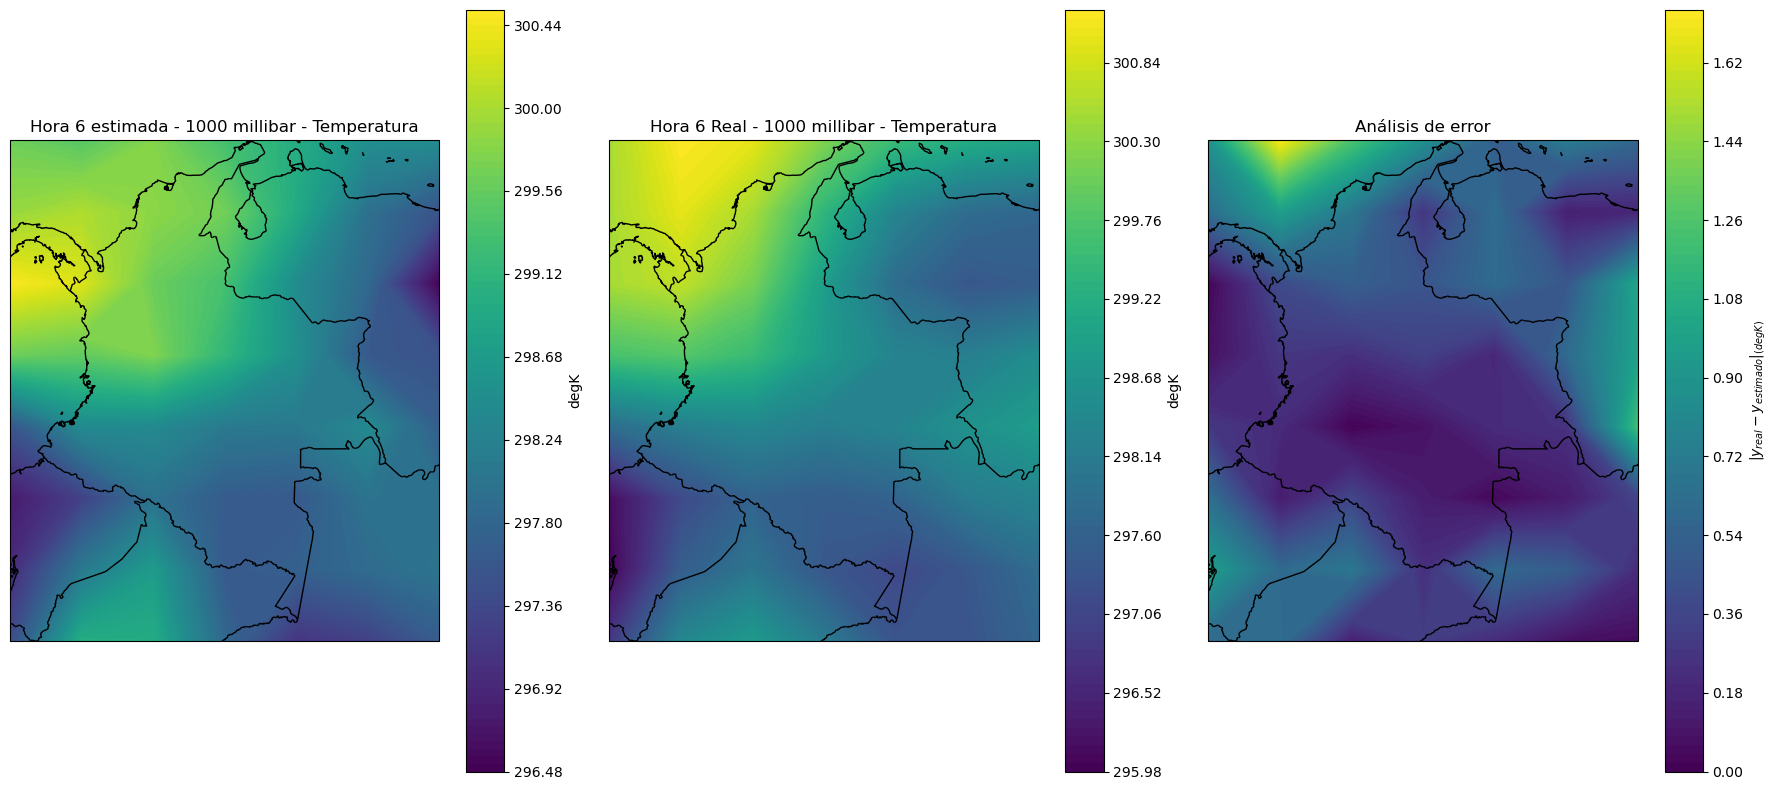

In [18]:
i = 0
X_pred = model.predict([X_test[i]])

# Configurar el tamaño y diseño de los subplots
fig, axs = plt.subplots(1, 3, figsize=(18,8), subplot_kw={'projection': ccrs.PlateCarree()})

# Configurar características del mapa en todos los subplots
for ax in axs:
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=1, edgecolor='k')

# Graficar el primer subplot con los datos X_pred
cs1 = axs[0].contourf(lons, lats, X_pred.reshape(lat_dim, lon_dim),
                      transform=ccrs.PlateCarree(), cmap='viridis', levels=100)
plt.colorbar(cs1, ax=axs[0], label='degK')
axs[0].set_title('Hora 6 estimada - 1000 millibar - Temperatura')

# Graficar el segundo subplot con los datos Y_test
cs2 = axs[1].contourf(lons, lats, Y_test[i].reshape(lat_dim, lon_dim),
                      transform=ccrs.PlateCarree(), cmap='viridis', levels=100)
plt.colorbar(cs2, ax=axs[1], label='degK')
axs[1].set_title('Hora 6 Real - 1000 millibar - Temperatura')

# Graficar el tercer subplot con el análisis de error
cs3 = axs[2].contourf(lons, lats, np.abs(Y_test[i].reshape(lat_dim, lon_dim) - X_pred.reshape(lat_dim, lon_dim)),
                      transform=ccrs.PlateCarree(), cmap='viridis', levels=100)
plt.colorbar(cs3, ax=axs[2], label='$|y_{real} - y_{estimado}|_{(degK)}$')
axs[2].set_title('Análisis de error')

# Ajustar los espacios entre subplots
plt.tight_layout()
plt.show()

In [78]:
# Definir los hiperparámetros a ajustar
param_grid = {
    'estimator__n_neighbors': [9, 11, 13],
    'estimator__weights': ['uniform', 'distance'],
    'estimator__algorithm': [ 'ball_tree', 'kd_tree', 'brute'],
    'estimator__leaf_size':[25,30,35],
    'estimator__p': [1,2,3],
    'estimator__metric': ['manhattan','euclidean']
}

# Crear el modelo
model = MultiOutputRegressor(KNeighborsRegressor(n_jobs=-1))
# Realizar GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X, Y)

# Obtener los mejores hiperparámetros y el mejor modelo
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [79]:
best_params

{'estimator__algorithm': 'ball_tree',
 'estimator__leaf_size': 25,
 'estimator__metric': 'euclidean',
 'estimator__n_neighbors': 13,
 'estimator__p': 1,
 'estimator__weights': 'distance'}

In [77]:
model = MultiOutputRegressor(KNeighborsRegressor(n_neighbors=11, algorithm='brute',leaf_size=25, metric='euclidean', p=1, weights='distance'))
model.fit(X,Y)
print(f'R^2: {model.score(X_test,Y_test)}')
print(f'MAE: {mean_absolute_error(Y_test,model.predict(X_test))}')
print(f'MAPE: {mean_absolute_percentage_error(Y_test,model.predict(X_test))}')

R^2: 0.42278006902381277
MAE: 0.5811184754846183
MAPE: 0.0019439743919084324


In [ ]:
# Definir los hiperparámetros a ajustar
param_grid_DT = {
    'estimator__criterion': ['squared_error','friedman_mse', 'absolute_error', 'poisson'],
    'estimator__splitter': ['best', 'random'],
    'estimator__max_depth': [None,10, 20, 30],
    'estimator__min_samples_split':[2,4,6],
    'estimator__min_samples_leaf': [1,2,3],
}


In [ ]:
# Crear el modelo
model = MultiOutputRegressor(KNeighborsRegressor(n_jobs=-1))
# Realizar GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X, Y)

# Obtener los mejores hiperparámetros y el mejor modelo
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_